<a href="https://colab.research.google.com/github/irfan7210/Rossman-Retail-Sales-Prediction/blob/main/Copy_of_Rossmann_Sales_Prediction_by_3rd_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stores_df = pd.read_csv("/content/drive/MyDrive/Copy of Rossmann Stores Data.csv")
sale_df = pd.read_csv("/content/drive/MyDrive/Copy of store.csv")

In [ ]:
stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
stores_df.shape

(1017209, 9)

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sale_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#sale_df['CompetitionOpenSinceMonth'].fillna(sales1['CompetitionOpenSinceMonth'].mode(), inplace = True)
#sale_df['CompetitionOpenSinceYear'].fillna(sales1['CompetitionOpenSinceYear'].mode(), inplace = True)

In [ ]:
sales1 = pd.merge(sale_df, stores_df, on='Store', how='left')

In [ ]:
sales1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [ ]:
stores_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
sale_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#filling null value
sales1['CompetitionDistance'].fillna(sales1['CompetitionDistance'].median(), inplace = True)
sales1['CompetitionOpenSinceMonth'].fillna(sales1['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
sales1['CompetitionOpenSinceYear'].fillna(sales1['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
sales1['Promo2SinceWeek'].fillna(value=0,inplace=True)
sales1['Promo2SinceYear'].fillna(value=0,inplace=True)
sales1['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [ ]:
sales1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [ ]:
categorical_independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#sales1['StateHoliday'].replace({'0':0 , '1':1 }, inplace=True)

In [ ]:
#sales1.info()

In [ ]:
sales1['Date'] = pd.to_datetime( sales1[ 'Date' ] )
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [ ]:
#sales1 = sales1.astype({'CompetitionOpenSinceMonth':'int64', 'CompetitionOpenSinceYear':'int64', 'Promo2SinceWeek ':'int64', 'Promo2SinceYear':'int64' })


## **Exploratory Data Analysis**

In [ ]:
'''categorical_variables_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for value in categorical_independent_variables:
  ax = sns.barplot(x=sales1[value], y=sales1['Sales'])
  #now here trying to show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()'''

"categorical_variables_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',\n                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']\nfor value in categorical_independent_variables:\n  ax = sns.barplot(x=sales1[value], y=sales1['Sales'])\n  #now here trying to show percentage at bar plot\n  totals = []\n  for i in ax.patches:\n      totals.append(i.get_height())\n      total = sum(totals)\n\n  for i in ax.patches:  \n      ax.text(i.get_x() - .01, i.get_height() + .5,               str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)\n\n  plt.show()"

# checking competition

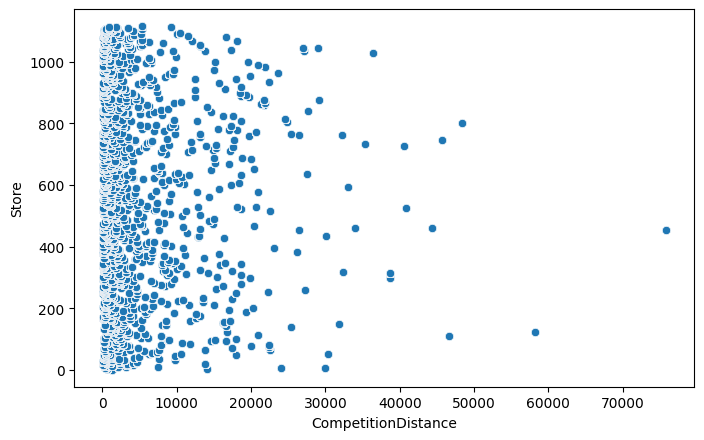

In [ ]:
sns.scatterplot(x=sales1['CompetitionDistance'], y=sales1['Store'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

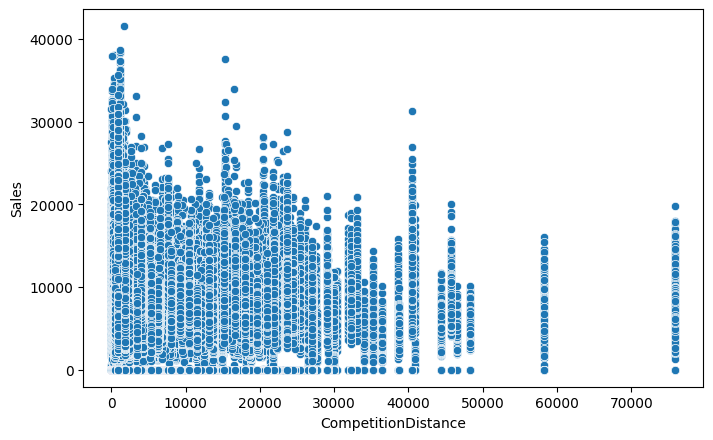

In [ ]:
sns.scatterplot(x=sales1['CompetitionDistance'], y=sales1['Sales'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

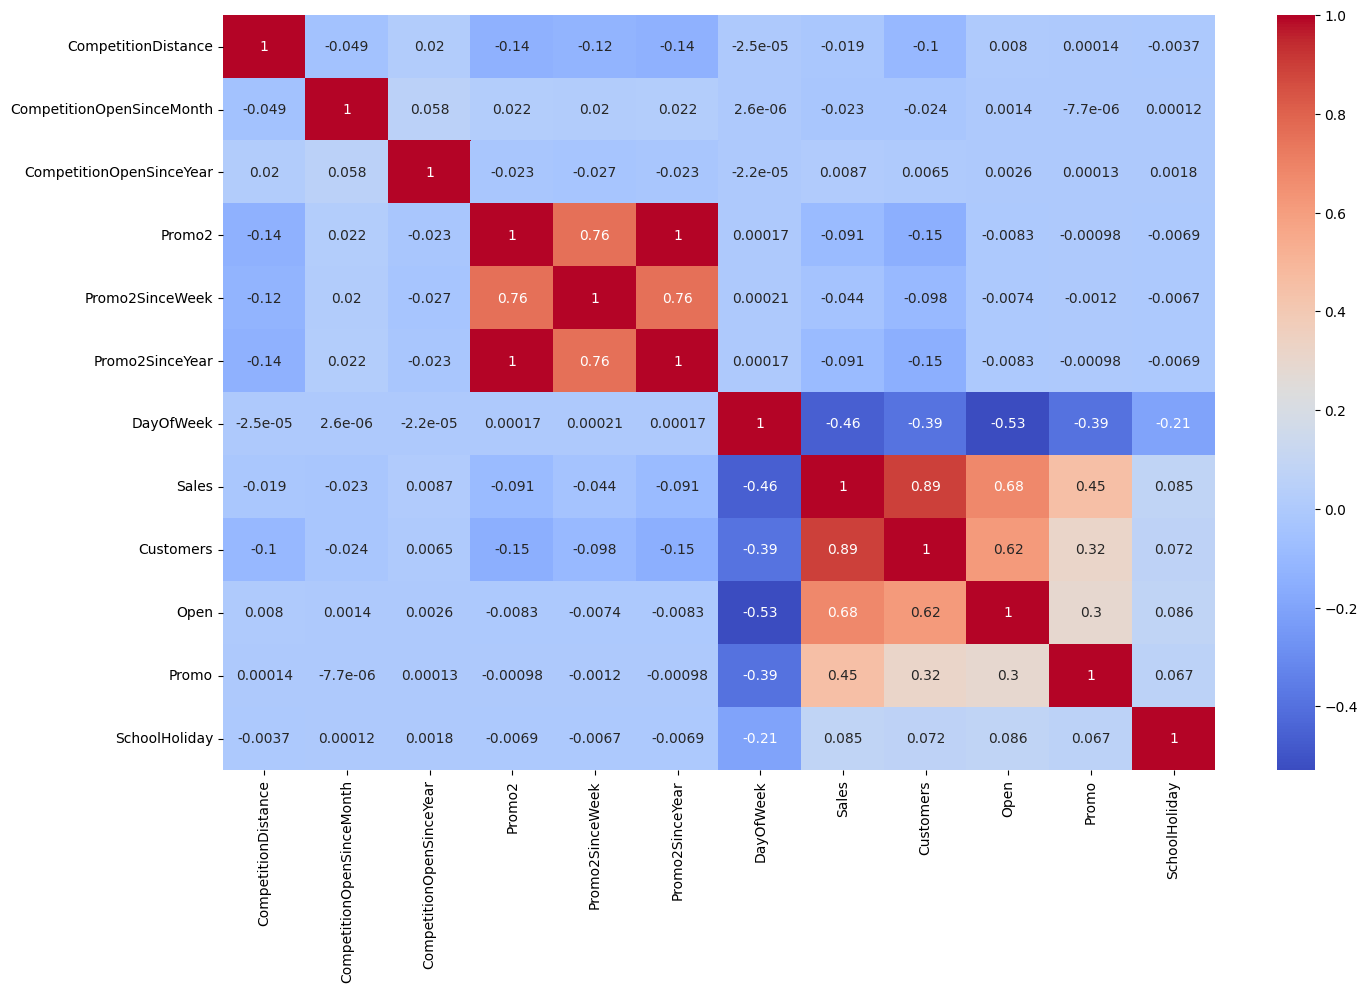

In [ ]:
plt.figure(figsize=(16,10))
sales_corr_df = sales1.drop(columns = "Store", axis =1)
sns.heatmap(sales_corr_df.corr(), cmap="coolwarm", annot=True)

There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

# lets check sales distribution

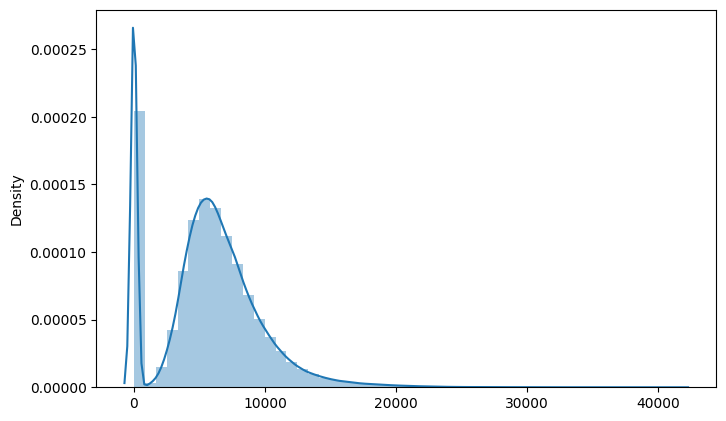

In [ ]:
sns.distplot(x=sales1['Sales'])

distribution plot of Sales positively skewed

In [ ]:
sales1["Date"] = pd.to_datetime(sales1["Date"])
sales1["Year"] = sales1["Date"].dt.year
sales1["Month"] = sales1["Date"].dt.month
sales1["Week"] = sales1["Date"].dt.week%4
sales1["WeekOfYear"] = sales1["Date"].dt.week

In [ ]:
def with_percent (plot , feature):
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

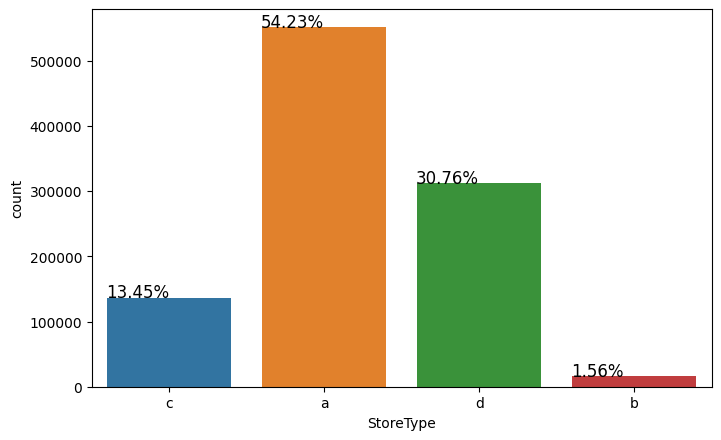

In [ ]:
ax=sns.countplot(sales1['StoreType'])
with_percent(ax, sales1['StoreType'])

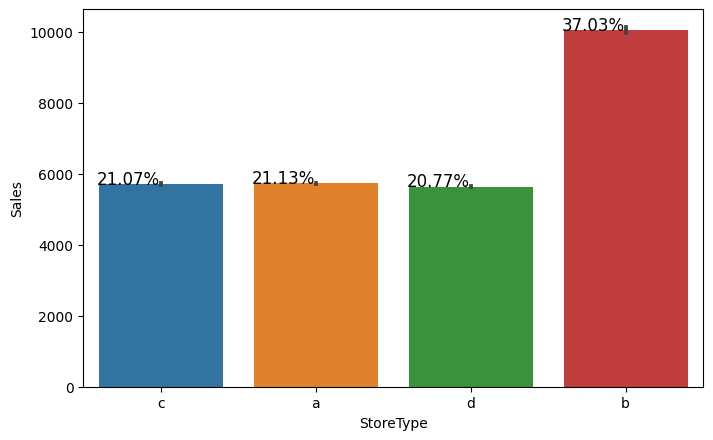

In [ ]:
ax = sns.barplot(x=sales1['StoreType'], y=sales1['Sales'])
with_percent(ax, sales1['Sales'])

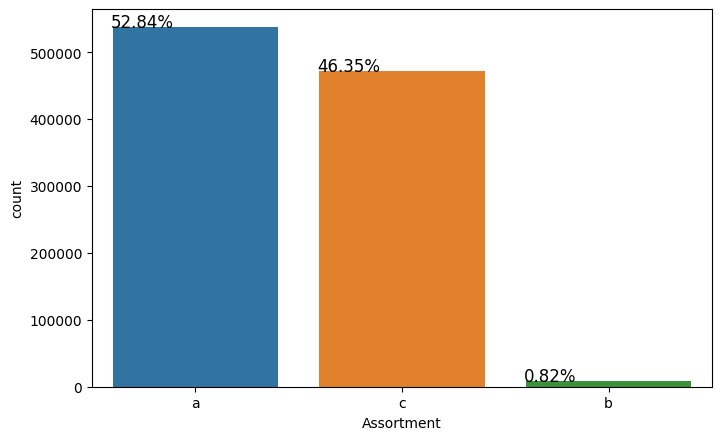

In [ ]:
ax=sns.countplot(sales1['Assortment'])
with_percent(ax, sales1['Assortment'])

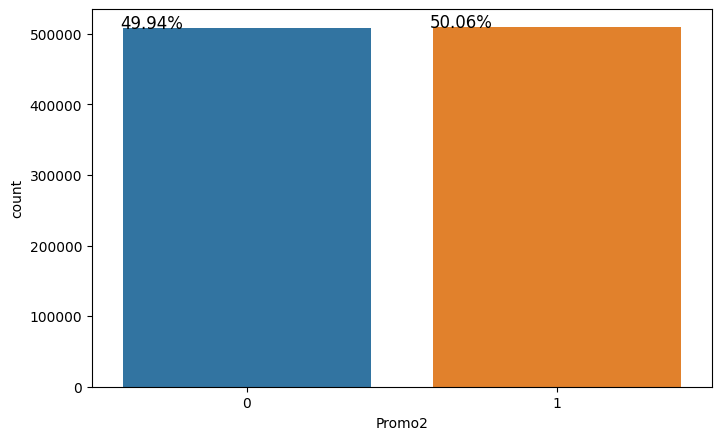

In [ ]:
ax=sns.countplot(sales1['Promo2'])
with_percent(ax, sales1['Promo2'])

## here we are checking average sale of each type of store

In [ ]:
print(sales1[sales1['StoreType'] == 'a']['Sales'].mean())
print(sales1[sales1['StoreType'] == 'b']['Sales'].mean())
print(sales1[sales1['StoreType'] == 'c']['Sales'].mean())
print(sales1[sales1['StoreType'] == 'd']['Sales'].mean())

5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


here we can see that average sale of b type of store is high.

# Feature Selection

In [ ]:
#convering catogrical variables into numerical
sales1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
sales1['CompetitionOpen']= (sales1['Year'] - sales1['CompetitionOpenSinceYear'])*12 + (sales1['Month'] - sales1['CompetitionOpenSinceMonth'])
sales1['CompetitionOpen']

0          82.0
1          82.0
2          82.0
3          82.0
4          82.0
           ... 
1017204    -8.0
1017205    -8.0
1017206    -8.0
1017207    -8.0
1017208    -8.0
Name: CompetitionOpen, Length: 1017209, dtype: float64

In [ ]:
sales1['PromoOpen'] = (12*(sales1['Year']-sales1['Promo2SinceYear']))+sales1['Month']-((sales1['Promo2SinceWeek']/4))
sales1['PromoOpen']

0          24187.0
1          24187.0
2          24187.0
3          24187.0
4          24187.0
            ...   
1017204        7.5
1017205        7.5
1017206        7.5
1017207        7.5
1017208        7.5
Name: PromoOpen, Length: 1017209, dtype: float64

In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [ ]:
y=sales1[(sales1['Promo']==1)]

In [ ]:
#removing negative vand zero vale which means not running any promo
sales1.loc[sales1['PromoOpen']<0, 'PromoOpen'] = 0
sales1[sales1['PromoOpen']<0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,WeekOfYear,CompetitionOpen,PromoOpen


In [ ]:
sales1[sales1['CompetitionOpen']<0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,WeekOfYear,CompetitionOpen,PromoOpen
3890,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,...,1,1,0,0,2015,3,2,14,-1.0,24183.0
3891,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,...,1,1,0,0,2015,3,2,14,-1.0,24183.0
3892,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,...,0,0,0,0,2015,3,1,13,-1.0,24183.0
3893,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,...,1,0,0,0,2015,3,1,13,-1.0,24183.0
3894,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,...,1,0,0,0,2015,3,1,13,-1.0,24183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,1,1,-8.0,7.5
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,1,1,-8.0,7.5
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,1,1,-8.0,7.5
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,1,0,0,1,2013,1,1,1,-8.0,7.5


In [ ]:
sales1.loc[sales1['CompetitionOpen']<0, 'CompetitionOpen'] = 0
sales1[sales1['CompetitionOpen']<0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,WeekOfYear,CompetitionOpen,PromoOpen


In [ ]:
sales1=pd.get_dummies(columns = ['StoreType' , 'Assortment'] ,data = sales1 ,drop_first = True)

In [ ]:
sales1.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,...,Month,Week,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,...,7,3,31,82.0,24187.0,0,1,0,0,0
1,1,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,...,7,3,31,82.0,24187.0,0,1,0,0,0
2,1,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,...,7,3,31,82.0,24187.0,0,1,0,0,0
3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,...,7,3,31,82.0,24187.0,0,1,0,0,0
4,1,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,...,7,3,31,82.0,24187.0,0,1,0,0,0


In [ ]:
#changing into boolean 
sales1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(sales1):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
   months = sales1['PromoInterval'].str.split(',')
   if sales1['Month'] and month_dict[sales1['Month']] in months:
      return 1
   else:
      return 0
  except Exception:
     return 0


In [ ]:
#Applying 
sales1['Promo2running'] = sales1.apply(promo2running,axis=1)*sales1['Promo2']

In [ ]:
sales1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [ ]:
sales1.head(10)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,...,Week,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2running
0,1,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,...,3,31,82.0,24187.0,0,1,0,0,0,0
1,1,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,...,3,31,82.0,24187.0,0,1,0,0,0,0
2,1,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,...,3,31,82.0,24187.0,0,1,0,0,0,0
3,1,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,...,3,31,82.0,24187.0,0,1,0,0,0,0
4,1,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,...,3,31,82.0,24187.0,0,1,0,0,0,0
5,1,1270.0,9.0,2008.0,0,7,2015-07-26,0,0,0,...,2,30,82.0,24187.0,0,1,0,0,0,0
6,1,1270.0,9.0,2008.0,0,6,2015-07-25,4364,500,1,...,2,30,82.0,24187.0,0,1,0,0,0,0
7,1,1270.0,9.0,2008.0,0,5,2015-07-24,3706,459,1,...,2,30,82.0,24187.0,0,1,0,0,0,0
8,1,1270.0,9.0,2008.0,0,4,2015-07-23,3769,503,1,...,2,30,82.0,24187.0,0,1,0,0,0,0
9,1,1270.0,9.0,2008.0,0,3,2015-07-22,3464,463,1,...,2,30,82.0,24187.0,0,1,0,0,0,0


In [ ]:
z=(sales1['Promo2running'] ==0).value_counts()
print(z)

True    1017209
Name: Promo2running, dtype: int64


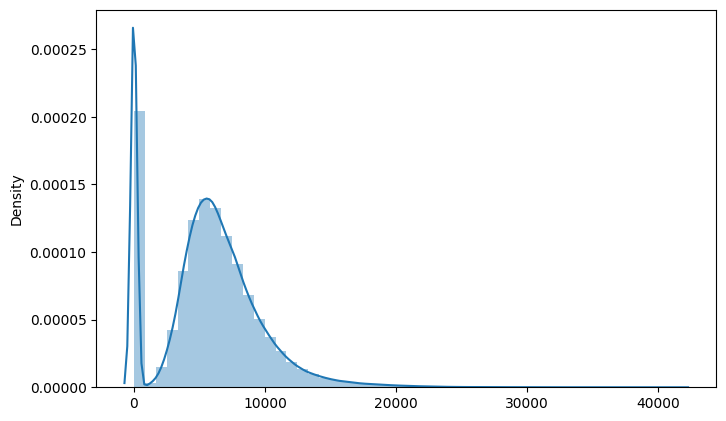

In [ ]:
sns.distplot(x=sales1['Sales'])

In [ ]:
df=sales1.copy()

## **Hyopothesis testing**

In [ ]:
sale_mean = df['Sales'].mean()
sale_mean

5773.818972305593

In [ ]:
hyp1=df["Sales"].sample(n=50000)


In [ ]:
import scipy
stat, p =scipy.stats.ttest_1samp(hyp1,5700)
if p > 0.05:
  print("we failled to reject null hypothesis")
else:
  print("we reject the null hypothesis")

Ttest_1sampResult(statistic=4.636153866187235, pvalue=3.558476104815376e-06)

# lets check sale 2nd year is greater than 3rd year.

In [ ]:
df.columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'DayOfWeek', 'Date', 'Sales',
       'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year',
       'Month', 'Week', 'WeekOfYear', 'CompetitionOpen', 'PromoOpen',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2running'],
      dtype='object')

In [ ]:
#lets extract sale of each year
yearly_sale = df.groupby(['Year'])['Sales'].mean()
yearly_sale

Year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

In [ ]:
df3 = df[df['Year']==2014].sample(n=50000)
df4 = df[df['Year']==2013].sample(n=50000)

In [ ]:
df31 = df3["Sales"].sample(n=50000)
df41 = df4["Sales"].sample(n=50000)

In [ ]:
#assumption- mean sale of both sample is equal 
#Ho = avg sale of bi=oth equal
# Ha = sale will be greater than last year 
stat, p = scipy.stats.ttest_ind(df41,df31)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
  print("we failled to reject null hypothesis")
else:
  print("we reject the null hypothesis")

stat=-6.05, p=0.000000001479785030500027891257
we reject the null hypothesis


In [ ]:
sales1['Sales'].skew()
sales1['Sales'].kurt()

1.7783747472372804

In [ ]:
X = sales1.copy()

In [ ]:
Y = X[X['Sales']==0].index


In [ ]:
X.drop(Y , inplace=True)

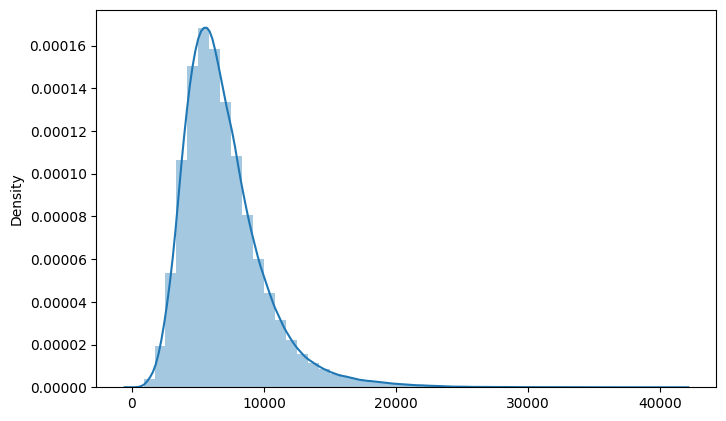

In [ ]:
sns.distplot(x=X['Sales'])

In [ ]:
X['Sales'].skew()

1.594928835753748

In [ ]:
X.shape

(844338, 25)

In [ ]:
X['Sales'].kurt()

4.854026585805931

In [ ]:
X.reset_index(inplace=True)

In [ ]:
sqr=np.sqrt(X['Sales'])

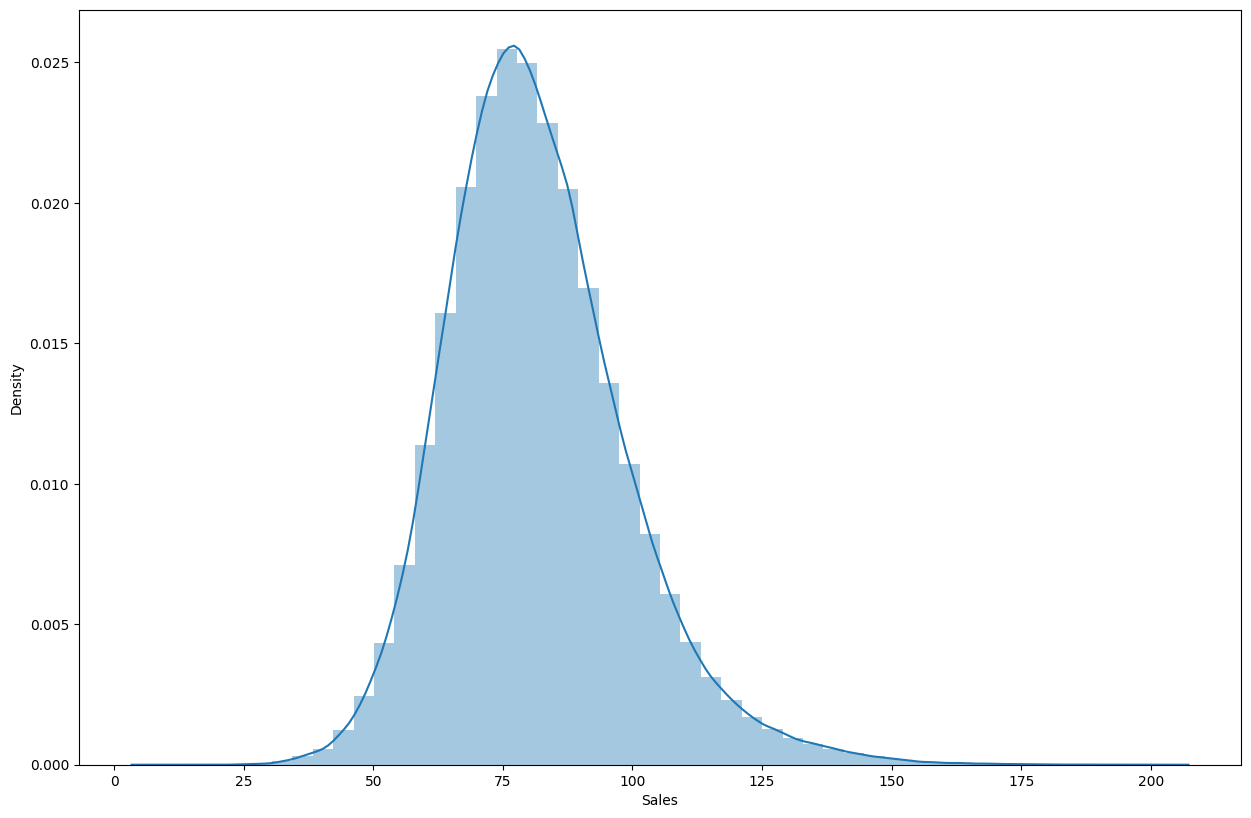

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(sqr)

In [ ]:
np.sqrt(X['Sales']).skew()

0.7012367857486632

In [ ]:
np.sqrt(X['Sales']).kurt()

1.2704604358290652

In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(X['Sales'])
X[(X.Sales < lower_bound) | (X.Sales > upper_bound)]

,index,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,...,Week,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2running
1894,2280,3,14130.0,12.0,2006.0,1,1,2014-06-30,15689,1193,...,3,27,90.0,38.5,0,0,0,0,0,0
2047,2469,3,14130.0,12.0,2006.0,1,1,2013-12-23,14461,1579,...,0,52,84.0,32.5,0,0,0,0,0,0
2052,2475,3,14130.0,12.0,2006.0,1,2,2013-12-17,14555,1284,...,3,51,84.0,32.5,0,0,0,0,0,0
2053,2476,3,14130.0,12.0,2006.0,1,1,2013-12-16,14647,1282,...,3,51,84.0,32.5,0,0,0,0,0,0
2344,2826,4,620.0,9.0,2009.0,0,5,2015-07-31,13995,1498,...,3,31,70.0,24187.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843552,1016260,1114,870.0,9.0,2013.0,0,1,2013-01-07,21237,2962,...,2,2,0.0,24157.0,0,0,0,0,1,0
843553,1016262,1114,870.0,9.0,2013.0,0,6,2013-01-05,18856,3065,...,1,1,0.0,24157.0,0,0,0,0,1,0
843554,1016263,1114,870.0,9.0,2013.0,0,5,2013-01-04,18371,3036,...,1,1,0.0,24157.0,0,0,0,0,1,0
843555,1016264,1114,870.0,9.0,2013.0,0,4,2013-01-03,18463,3211,...,1,1,0.0,24157.0,0,0,0,0,1,0


In [ ]:
dfnp = X[(X.Sales>lower_bound) & (X.Sales<upper_bound)]
dfnp

,index,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,...,Week,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2running
0,0,1,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,...,3,31,82.0,24187.0,0,1,0,0,0,0
1,1,1,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,...,3,31,82.0,24187.0,0,1,0,0,0,0
2,2,1,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,...,3,31,82.0,24187.0,0,1,0,0,0,0
3,3,1,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,...,3,31,82.0,24187.0,0,1,0,0,0,0
4,4,1,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,...,3,31,82.0,24187.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,1115,5350.0,9.0,2013.0,1,1,2013-01-07,6905,471,...,2,2,0.0,7.5,0,0,1,0,1,0
844334,1017204,1115,5350.0,9.0,2013.0,1,6,2013-01-05,4771,339,...,1,1,0.0,7.5,0,0,1,0,1,0
844335,1017205,1115,5350.0,9.0,2013.0,1,5,2013-01-04,4540,326,...,1,1,0.0,7.5,0,0,1,0,1,0
844336,1017206,1115,5350.0,9.0,2013.0,1,4,2013-01-03,4297,300,...,1,1,0.0,7.5,0,0,1,0,1,0


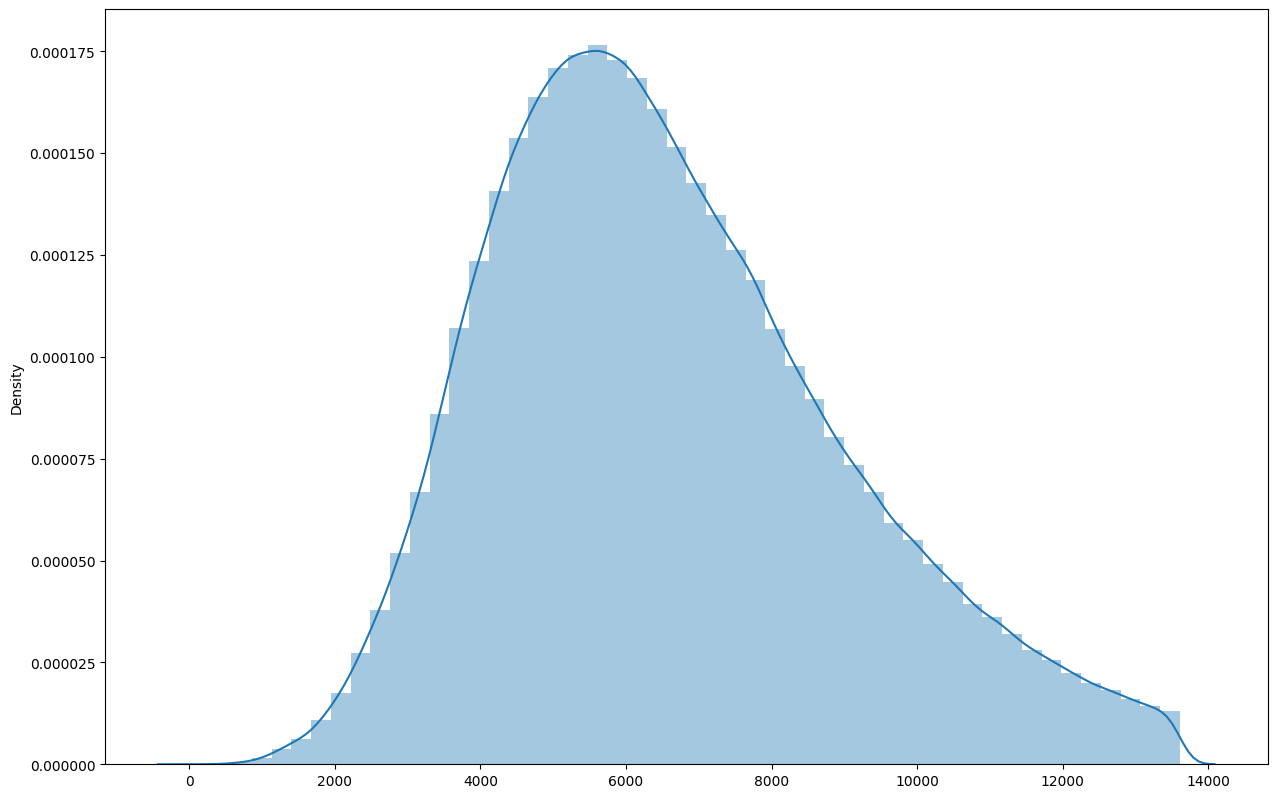

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(x=dfnp['Sales'])

In [ ]:
dfnp['Sales'].skew()

0.5448752872367241

In [ ]:
dfnp['Sales'].kurt()

-0.11877346246476961

In [ ]:
dfnp.shape

(813569, 26)

In [ ]:
## transformation
dfnp['Sales'] = np.sqrt(dfnp['Sales'])

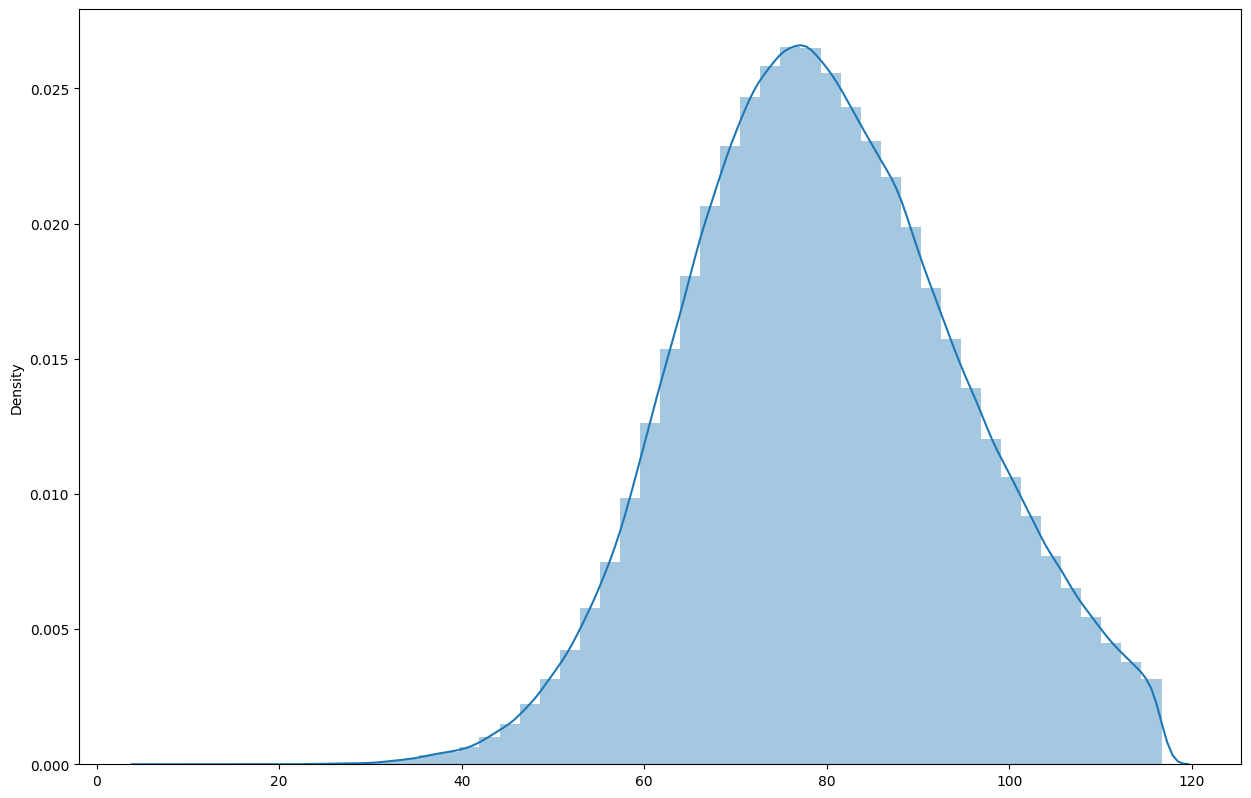

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(x=dfnp['Sales'])

In [ ]:
dfnp['Sales'].skew()

0.08641336002771034

In [ ]:
dfnp['Sales'].kurt()

-0.2856733900467794

In [ ]:
dfnp.dropna(inplace=True)

In [ ]:
dfnp_1=dfnp.copy()

In [ ]:
dfnp_1.head(1)

,index,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,...,Week,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2running
0,0,1,1270.0,9.0,2008.0,0,5,2015-07-31,72.546537,555,...,3,31,82.0,24187.0,0,1,0,0,0,0


In [ ]:
# we won't need customers for sales forecasting
#dfnp_1.drop('Customers',axis=1,inplace=True)

In [ ]:
dfnp_1['Customer_lg'] = dfnp_1['Customers'].map(lambda x : np.log(x) if x != 0 else 0)
dfnp_1['CompetitionDistance_lg'] = dfnp_1['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
dfnp_1['PromoOpen_lg'] = dfnp_1['PromoOpen'].map(lambda x : np.log(x) if x != 0 else 0)
dfnp_1['CompetitionOpen_lg'] = dfnp_1['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)


In [ ]:
numeric_features_lg = ['Customer_lg','CompetitionDistance_lg','PromoOpen_lg','CompetitionOpen_lg']


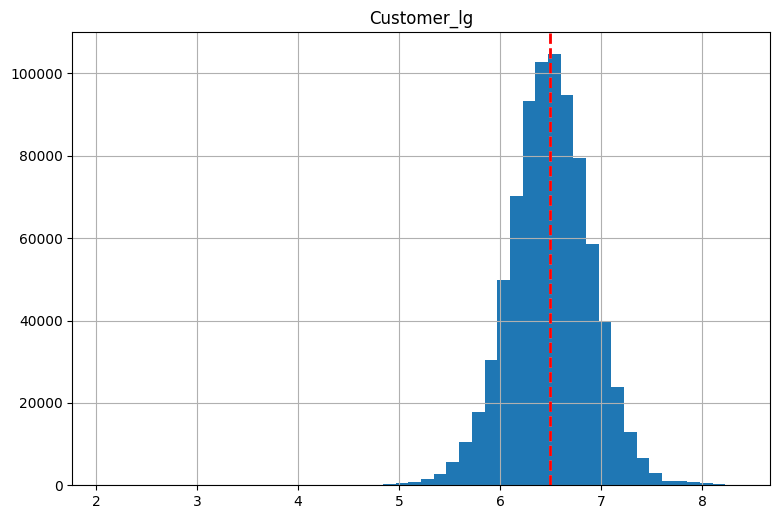

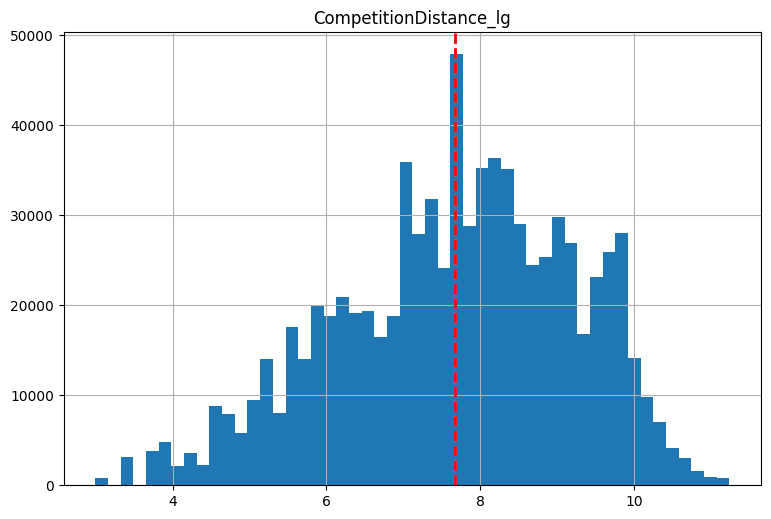

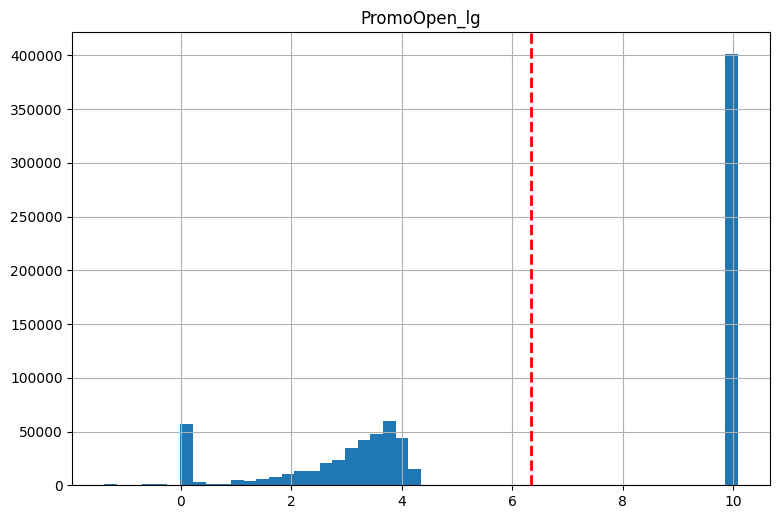

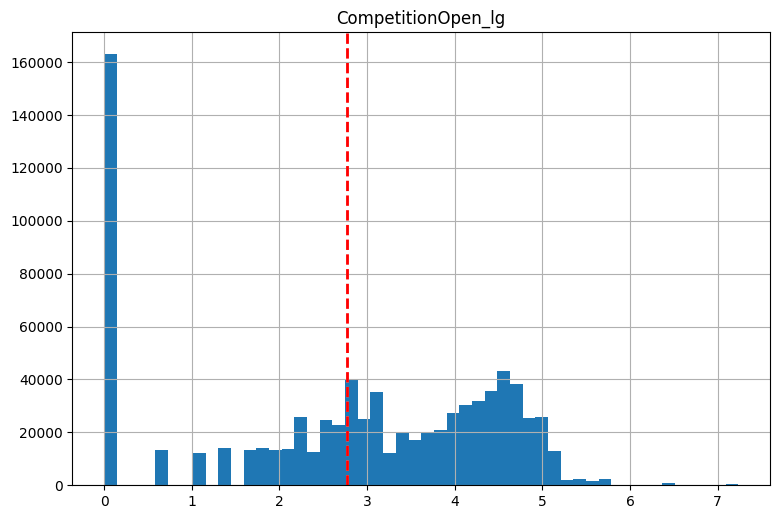

In [ ]:
for col in numeric_features_lg:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  dfnp_1[col].hist(bins=50, ax=ax)
  ax.axvline(dfnp_1[col].mean(), color = 'pink',linestyle = 'dashed',linewidth=2)
  ax.axvline(dfnp_1[col].mean(), color = 'red',linestyle = 'dashed',linewidth=2)
  ax.set_title(col)


In [ ]:
dfnp_1.drop(['Customers','CompetitionDistance','PromoOpen','CompetitionOpen'] , axis=1, inplace=True)

In [ ]:
dfnp_1.isnull().sum()

index                        0
Store                        0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
DayOfWeek                    0
Date                         0
Sales                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Week                         0
WeekOfYear                   0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_b                 0
Assortment_c                 0
Promo2running                0
Customer_lg                  0
CompetitionDistance_lg       0
PromoOpen_lg                 0
CompetitionOpen_lg           0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler()
data = dfnp_1[['Customer_lg','CompetitionDistance_lg','PromoOpen_lg','CompetitionOpen_lg','Sales']]
std_data = Scale.fit_transform(data)
std_data = pd.DataFrame(std_data, columns = 'scaled_'+ data.columns)
std_data.tail()


,scaled_Customer_lg,scaled_CompetitionDistance_lg,scaled_PromoOpen_lg,scaled_CompetitionOpen_lg,scaled_Sales
813564,-0.857126,0.589521,-1.132634,-1.599661,0.223235
813565,-1.679530,0.589521,-1.132634,-1.599661,-0.715121
813566,-1.777318,0.589521,-1.132634,-1.599661,-0.828395
813567,-1.985171,0.589521,-1.132634,-1.599661,-0.950710
813568,-1.943834,0.589521,-1.132634,-1.599661,-1.268441


In [ ]:
dfnp_1.reset_index(drop=True, inplace=True)

In [ ]:
std_data.reset_index(drop=True, inplace=True)

In [ ]:
std_data.isnull().sum()

scaled_Customer_lg               0
scaled_CompetitionDistance_lg    0
scaled_PromoOpen_lg              0
scaled_CompetitionOpen_lg        0
scaled_Sales                     0
dtype: int64

In [ ]:
dfnp_2=pd.concat([dfnp_1,std_data],axis=1)
dfnp_2

,index,Store,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Open,Promo,...,Promo2running,Customer_lg,CompetitionDistance_lg,PromoOpen_lg,CompetitionOpen_lg,scaled_Customer_lg,scaled_CompetitionDistance_lg,scaled_PromoOpen_lg,scaled_CompetitionOpen_lg,scaled_Sales
0,0,1,9.0,2008.0,0,5,2015-07-31,72.546537,1,1,...,0,6.318968,7.146772,10.093571,4.406719,-0.446722,-0.338578,0.979909,0.948899,-0.482664
1,1,1,9.0,2008.0,0,4,2015-07-30,70.851958,1,1,...,0,6.302619,7.146772,10.093571,4.406719,-0.487607,-0.338578,0.979909,0.948899,-0.596051
2,2,1,9.0,2008.0,0,3,2015-07-29,69.152006,1,1,...,0,6.259581,7.146772,10.093571,4.406719,-0.595235,-0.338578,0.979909,0.948899,-0.709796
3,3,1,9.0,2008.0,0,2,2015-07-28,70.788417,1,1,...,0,6.327937,7.146772,10.093571,4.406719,-0.424293,-0.338578,0.979909,0.948899,-0.600302
4,4,1,9.0,2008.0,0,1,2015-07-27,78.115299,1,1,...,0,6.416732,7.146772,10.093571,4.406719,-0.202234,-0.338578,0.979909,0.948899,-0.110052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813564,1017202,1115,9.0,2013.0,1,1,2013-01-07,83.096330,1,1,...,0,6.154858,8.584852,2.014903,0.000000,-0.857126,0.589521,-1.132634,-1.599661,0.223235
813565,1017204,1115,9.0,2013.0,1,6,2013-01-05,69.072426,1,0,...,0,5.826000,8.584852,2.014903,0.000000,-1.679530,0.589521,-1.132634,-1.599661,-0.715121
813566,1017205,1115,9.0,2013.0,1,5,2013-01-04,67.379522,1,0,...,0,5.786897,8.584852,2.014903,0.000000,-1.777318,0.589521,-1.132634,-1.599661,-0.828395
813567,1017206,1115,9.0,2013.0,1,4,2013-01-03,65.551506,1,0,...,0,5.703782,8.584852,2.014903,0.000000,-1.985171,0.589521,-1.132634,-1.599661,-0.950710


In [ ]:
dfnp_2.drop(['Customer_lg','CompetitionDistance_lg','PromoOpen_lg','CompetitionOpen_lg','Sales'],axis=1, inplace = True)

In [ ]:
dfnp_final = dfnp_2.copy()

In [ ]:
dfnp_final.head()

,index,Store,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Open,Promo,StateHoliday,...,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2running,scaled_Customer_lg,scaled_CompetitionDistance_lg,scaled_PromoOpen_lg,scaled_CompetitionOpen_lg,scaled_Sales
0,0,1,9.0,2008.0,0,5,2015-07-31,1,1,0,...,1,0,0,0,0,-0.446722,-0.338578,0.979909,0.948899,-0.482664
1,1,1,9.0,2008.0,0,4,2015-07-30,1,1,0,...,1,0,0,0,0,-0.487607,-0.338578,0.979909,0.948899,-0.596051
2,2,1,9.0,2008.0,0,3,2015-07-29,1,1,0,...,1,0,0,0,0,-0.595235,-0.338578,0.979909,0.948899,-0.709796
3,3,1,9.0,2008.0,0,2,2015-07-28,1,1,0,...,1,0,0,0,0,-0.424293,-0.338578,0.979909,0.948899,-0.600302
4,4,1,9.0,2008.0,0,1,2015-07-27,1,1,0,...,1,0,0,0,0,-0.202234,-0.338578,0.979909,0.948899,-0.110052


In [ ]:
dfnp_final.isnull().sum()

index                            0
Store                            0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
Year                             0
Month                            0
Week                             0
WeekOfYear                       0
StoreType_b                      0
StoreType_c                      0
StoreType_d                      0
Assortment_b                     0
Assortment_c                     0
Promo2running                    0
scaled_Customer_lg               0
scaled_CompetitionDistance_lg    0
scaled_PromoOpen_lg              0
scaled_CompetitionOpen_lg        0
scaled_Sales                     0
dtype: int64

In [ ]:
dfnp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813569 entries, 0 to 813568
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          813569 non-null  int64         
 1   Store                          813569 non-null  int64         
 2   CompetitionOpenSinceMonth      813569 non-null  float64       
 3   CompetitionOpenSinceYear       813569 non-null  float64       
 4   Promo2                         813569 non-null  int64         
 5   DayOfWeek                      813569 non-null  int64         
 6   Date                           813569 non-null  datetime64[ns]
 7   Open                           813569 non-null  int64         
 8   Promo                          813569 non-null  int64         
 9   StateHoliday                   813569 non-null  object        
 10  SchoolHoliday                  813569 non-null  int64         
 11  

In [ ]:
dfnp_final.drop(['Date','Store'],axis=1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x=dfnp_final.iloc[:,:-1]

In [ ]:
y=dfnp_final['scaled_Sales']

In [ ]:

score=[]
for i in range (50):
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.2)
 reg = LinearRegression()
 reg.fit(x_train,y_train)
 y_pred = reg.predict(x_test)
 score.append(r2_score(y_pred,y_test))

In [ ]:
np.argmax(score)

37

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=37,test_size=0.2)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

0.799055710792098

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
'''lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)'''

"lasso = Lasso()\nparameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}\nlasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)\nlasso_regressor.fit(x_train, y_train)"

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

NameError: ignored

In [ ]:
lasso_reg=Lasso(alpha=1e-05 , max_iter=2500)

In [ ]:
lasso_reg.fit(x_train,y_train)

In [ ]:
predict_lasso = lasso_reg.predict(x_test)

In [ ]:
predict_lasso

In [ ]:
y_test

In [ ]:
type(y_test.values)

In [ ]:
r2_score(predict_lasso,y_test)

In [ ]:
#Import the adj_r2_score function
#from sklearn_extra.metrics import adj_r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
MSE  = mean_squared_error(y_test,predict_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#print("Adjusted R2 : ",1-(1-r2_score((y_test), (predict_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))